# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.

2. Scroll down to API and click Create New API Token.

3. Open up `kaggle.json` and use the username and key.


## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached https://files.pythonhosted.org/packages/a4/6d/6463d49a933f547439d6b5b98b46af8742cc03ae83543e4d7688c2420f8b/pip-21.3.1-py3-none-any.whl
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
  Using cached setuptools-59.6.0-py3-none-any.whl (952 kB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Using cached Jinja2-3.0.3-py3-none-any.whl (133 kB)
  Using cached MarkupSafe-2.0.1-cp36-cp36m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (30 kB)
     |████████████████████████████████| 352 kB 51.4 MB/s            
     |████████████████████████████████| 56 kB 60.3 MB/s            
     |█

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "muhamadkurniawan"
kaggle_key = "8398eafdb7cfbb46fbefb423b71c8a7e"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
/bin/sh: 1: unzip: not found


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later

train = pd.read_csv('dataset/train.csv')
train['datetime'] = pd.to_datetime(train['datetime'], errors='coerce')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test =  pd.read_csv('dataset/test.csv', date_parser='datetime')
test['datetime'] = pd.to_datetime(test['datetime'], errors='coerce')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission =  pd.read_csv('dataset/sampleSubmission.csv', date_parser='datetime')
submission['datetime'] = pd.to_datetime(submission['datetime'], errors='coerce')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
train.drop(['casual', 'registered'], axis = 1, inplace = True) 

In [ ]:
predictor = TabularPredictor(label="count", eval_metric='root_mean_squared_error').fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230528_004524/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230528_004524/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 9
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1043.06 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.1% of available memory)
	Inferring data type of each feature based on column va

[1000]	train_set's rmse: 123.806	valid_set's rmse: 134.369
[2000]	train_set's rmse: 117.412	valid_set's rmse: 133.705


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 123.42	valid_set's rmse: 141.5


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 125.097	valid_set's rmse: 128.797
[2000]	train_set's rmse: 119.003	valid_set's rmse: 127.909
[3000]	train_set's rmse: 114.63	valid_set's rmse: 127.431
[4000]	train_set's rmse: 111.295	valid_set's rmse: 126.943
[5000]	train_set's rmse: 108.576	valid_set's rmse: 126.844
[6000]	train_set's rmse: 106.085	valid_set's rmse: 126.71


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.131	valid_set's rmse: 138.303
[2000]	train_set's rmse: 117.833	valid_set's rmse: 137.535


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.871	valid_set's rmse: 128.052
[2000]	train_set's rmse: 118.547	valid_set's rmse: 127.003
[3000]	train_set's rmse: 114.124	valid_set's rmse: 126.834
[4000]	train_set's rmse: 110.645	valid_set's rmse: 126.694


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.654	valid_set's rmse: 135.095
[2000]	train_set's rmse: 118.764	valid_set's rmse: 133.849
[3000]	train_set's rmse: 114.615	valid_set's rmse: 133.509
[4000]	train_set's rmse: 111.249	valid_set's rmse: 133.472
[5000]	train_set's rmse: 108.455	valid_set's rmse: 133.281


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.01	valid_set's rmse: 139.355
[2000]	train_set's rmse: 117.819	valid_set's rmse: 138.312
[3000]	train_set's rmse: 113.4	valid_set's rmse: 137.886
[4000]	train_set's rmse: 110.032	valid_set's rmse: 137.758


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.47	valid_set's rmse: 135.412


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.18	valid_set's rmse: 137.579
[2000]	train_set's rmse: 117.782	valid_set's rmse: 136.664
[3000]	train_set's rmse: 113.447	valid_set's rmse: 136.246
[4000]	train_set's rmse: 109.982	valid_set's rmse: 136.227


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.641	valid_set's rmse: 132.484


	-134.0883	 = Validation score   (root_mean_squared_error)
	50.72s	 = Training   runtime
	2.35s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 340.01s of the 539.98s of remaining time.
/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' arg

[1000]	train_set's rmse: 96.0217	valid_set's rmse: 123.249


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 94.7479	valid_set's rmse: 135.635


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.3055	valid_set's rmse: 132.087


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.1635	valid_set's rmse: 131.521


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-132.2864	 = Validation score   (root_mean_squared_error)
	13.81s	 = Training   runtime
	0.47s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 323.82s of the 523.78s of remaining time.
	-118.922	 = Validation score   (root_mean_squared_error)
	4.4s	 = Training   runtime
	

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -116.472370       8.509372  533.579217                0.000891           0.530826            3       True         19
1        LightGBMXT_BAG_L2 -116.862310       5.656765  380.310994                0.204061          11.395973            2       True         11
2          CatBoost_BAG_L2 -117.262779       5.494096  392.314859                0.041392          23.399838            2       True         14
3          LightGBM_BAG_L2 -117.681631       5.553235  376.564687                0.100531           7.649666            2       True         12
4           XGBoost_BAG_L2 -118.434445       5.526220  383.454280                0.073516          14.539259            2       True         16
5      WeightedEnsemble_L2 -118.835420       1.955933  229.604024         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L2': 'StackerEnsembleModel_TabularNeuralNet',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'Weig

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0     84.294037
1     88.346718
2     88.346695
3    102.104958
4    102.104851
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      208.416687
std       126.800522
min         8.179289
25%       107.064301
50%       191.878204
75%       291.139954
max       644.698181
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
0

0

In [ ]:
# Set them to zero


### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 453kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName            date                 description                                      status    publicScore  privateScore  
------------------  -------------------  -----------------------------------------------  --------  -----------  ------------  
submission.csv      2023-05-28 00:59:07  first raw submission                             complete  1.38027      1.38027       
submission.csv      2023-05-28 00:18:54  first raw submission                             complete  1.38679      1.38679       
submission.csv      2023-05-27 12:04:01  first raw submission                             complete  1.38603      1.38603       
submission (8).csv  2023-03-30 02:57:24  random forest + log target                       complete  0.44715      0.44715       


#### Initial score of `1.38027`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

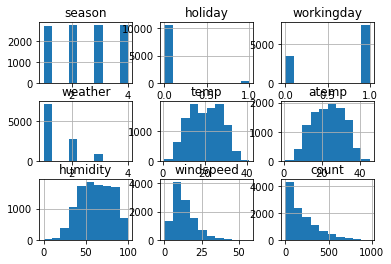

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [ ]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
test['day'] = test['datetime'].dt.day
train['month'] = train['datetime'].dt.month
test['month'] = test['datetime'].dt.month
train['year'] = train['datetime'].dt.year
test['year'] = test['datetime'].dt.year

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1,2011


array([[<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=object)

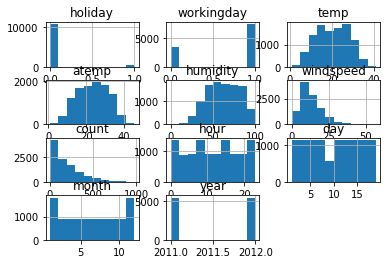

In [ ]:
# View histogram of all features again now with the hour feature
train.hist()

<ipython-input-116-d3653c554031>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(train.corr(), annot=False)


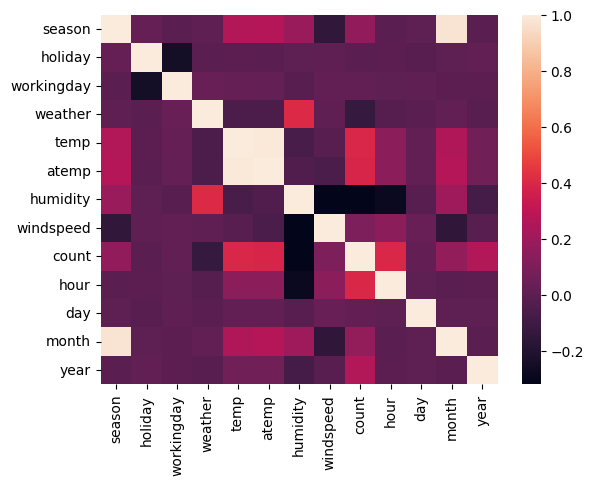

In [ ]:
import seaborn as sb
import matplotlib.pyplot as mp
dataplot = sb.heatmap(train.corr(), annot=False)
  
# displaying heatmap
mp.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label="count", eval_metric='root_mean_squared_error').fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_065520/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230531_065520/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3017.8 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.0% of available memory)
	Inferring data type of each feature based on column va

[1000]	train_set's rmse: 30.4078	valid_set's rmse: 37.3053
[2000]	train_set's rmse: 25.4751	valid_set's rmse: 35.6693
[3000]	train_set's rmse: 22.6844	valid_set's rmse: 35.1261
[4000]	train_set's rmse: 20.7123	valid_set's rmse: 35.0519
[5000]	train_set's rmse: 19.1701	valid_set's rmse: 35.0844


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.1657	valid_set's rmse: 41.2379
[2000]	train_set's rmse: 25.3961	valid_set's rmse: 39.1906
[3000]	train_set's rmse: 22.7426	valid_set's rmse: 38.4302
[4000]	train_set's rmse: 20.7979	valid_set's rmse: 38.077
[5000]	train_set's rmse: 19.3097	valid_set's rmse: 37.8386
[6000]	train_set's rmse: 18.0851	valid_set's rmse: 37.7135
[7000]	train_set's rmse: 17.0092	valid_set's rmse: 37.6325
[8000]	train_set's rmse: 16.1027	valid_set's rmse: 37.5255
[9000]	train_set's rmse: 15.2904	valid_set's rmse: 37.487
[10000]	train_set's rmse: 14.5685	valid_set's rmse: 37.4719


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.6159	valid_set's rmse: 35.2015
[2000]	train_set's rmse: 25.6173	valid_set's rmse: 34.1714


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.1849	valid_set's rmse: 41.2009
[2000]	train_set's rmse: 25.3331	valid_set's rmse: 39.4902
[3000]	train_set's rmse: 22.6944	valid_set's rmse: 38.8614
[4000]	train_set's rmse: 20.805	valid_set's rmse: 38.4868
[5000]	train_set's rmse: 19.3254	valid_set's rmse: 38.2015
[6000]	train_set's rmse: 18.1206	valid_set's rmse: 37.9667
[7000]	train_set's rmse: 17.0597	valid_set's rmse: 37.8326
[8000]	train_set's rmse: 16.1632	valid_set's rmse: 37.7139
[9000]	train_set's rmse: 15.363	valid_set's rmse: 37.653
[10000]	train_set's rmse: 14.6499	valid_set's rmse: 37.5826


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.3335	valid_set's rmse: 38.4975
[2000]	train_set's rmse: 25.5257	valid_set's rmse: 37.0151
[3000]	train_set's rmse: 22.7254	valid_set's rmse: 36.7122
[4000]	train_set's rmse: 20.8148	valid_set's rmse: 36.6539
[5000]	train_set's rmse: 19.336	valid_set's rmse: 36.7113


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.4099	valid_set's rmse: 41.0605
[2000]	train_set's rmse: 25.2737	valid_set's rmse: 39.8917
[3000]	train_set's rmse: 22.5832	valid_set's rmse: 39.7317


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.288	valid_set's rmse: 37.8886
[2000]	train_set's rmse: 25.5888	valid_set's rmse: 35.5825
[3000]	train_set's rmse: 22.8855	valid_set's rmse: 34.9121
[4000]	train_set's rmse: 20.8754	valid_set's rmse: 34.4964
[5000]	train_set's rmse: 19.3034	valid_set's rmse: 34.3313
[6000]	train_set's rmse: 18.0717	valid_set's rmse: 34.2882
[7000]	train_set's rmse: 16.9666	valid_set's rmse: 34.2477
[8000]	train_set's rmse: 16.0087	valid_set's rmse: 34.2968


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.4106	valid_set's rmse: 39.472
[2000]	train_set's rmse: 25.3759	valid_set's rmse: 37.9497
[3000]	train_set's rmse: 22.6787	valid_set's rmse: 37.5857
[4000]	train_set's rmse: 20.7838	valid_set's rmse: 37.5362


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.3603	valid_set's rmse: 41.4378
[2000]	train_set's rmse: 25.4213	valid_set's rmse: 40.4168
[3000]	train_set's rmse: 22.6988	valid_set's rmse: 40.2908


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 31.0644	valid_set's rmse: 37.3786
[2000]	train_set's rmse: 25.9653	valid_set's rmse: 35.3739
[3000]	train_set's rmse: 23.2116	valid_set's rmse: 34.6924
[4000]	train_set's rmse: 21.2145	valid_set's rmse: 34.4946
[5000]	train_set's rmse: 19.6754	valid_set's rmse: 34.4496
[6000]	train_set's rmse: 18.4339	valid_set's rmse: 34.3737
[7000]	train_set's rmse: 17.3645	valid_set's rmse: 34.3172
[8000]	train_set's rmse: 16.4181	valid_set's rmse: 34.3103
[9000]	train_set's rmse: 15.5957	valid_set's rmse: 34.274
[10000]	train_set's rmse: 14.8553	valid_set's rmse: 34.3201


	-36.7297	 = Validation score   (root_mean_squared_error)
	95.31s	 = Training   runtime
	7.04s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 284.67s of the 484.47s of remaining time.
/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.1363	valid_set's rmse: 35.556
[2000]	train_set's rmse: 15.5229	valid_set's rmse: 35.4489


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.0431	valid_set's rmse: 36.9387
[2000]	train_set's rmse: 15.5393	valid_set's rmse: 36.1222
[3000]	train_set's rmse: 12.2068	valid_set's rmse: 35.9676
[4000]	train_set's rmse: 9.97753	valid_set's rmse: 35.9638


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4253	valid_set's rmse: 33.0295


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4591	valid_set's rmse: 38.0987
[2000]	train_set's rmse: 15.6967	valid_set's rmse: 37.1129
[3000]	train_set's rmse: 12.2044	valid_set's rmse: 36.7212
[4000]	train_set's rmse: 9.95476	valid_set's rmse: 36.6786


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.43	valid_set's rmse: 37.371
[2000]	train_set's rmse: 15.5136	valid_set's rmse: 36.986


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.6619	valid_set's rmse: 35.9541


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.0051	valid_set's rmse: 35.6024
[2000]	train_set's rmse: 15.4015	valid_set's rmse: 34.9824


/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.6/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.3287	valid_set's rmse: 36.3245
[2000]	train_set's rmse: 15.6834	valid_set's rmse: 35.8282
[3000]	train_set's rmse: 12.2992	valid_set's rmse: 35.5694
[4000]	train_set's rmse: 10.1773	valid_set's rmse: 35.5318


	-36.5863	 = Validation score   (root_mean_squared_error)
	35.81s	 = Training   runtime
	1.42s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 243.05s of the 442.85s of remaining time.
	-41.3054	 = Validation score   (root_mean_squared_error)
	10.8s	 = Training   runtime
	0.44s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 228.85s of the 428.65s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1.
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 178.08s of the 377.88s of remaining time.
	-41.104	 = Validation score   (root_mean_squared_error)
	4.71s	 = Training   runtime
	0.44s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 169.85s of the 369.65s of remaining time.
		future feature annotations is not defined (dispatch.py, line 4)
Detailed Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/autoglu

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -35.125367       9.224655  176.433259                0.000978           0.514486            2       True          9
1      WeightedEnsemble_L3  -35.261536      15.255032  467.414975                0.000896           0.464481            3       True         17
2          CatBoost_BAG_L2  -35.508752      12.079567  336.842267                0.059790          33.045462            2       True         13
3     ExtraTreesMSE_BAG_L2  -35.614459      12.500510  311.260073                0.480733           7.463269            2       True         14
4          LightGBM_BAG_L2  -35.741892      12.133332  310.803398                0.113554           7.006594            2       True         11
5   RandomForestMSE_BAG_L2  -36.057406      12.511541  331.009659         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L2': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.92263994015

In [ ]:
# Remember to set all negative values to zero
prediction_new_features = predictor_new_features.predict(test)
prediction_new_features.describe()

count    6493.000000
mean      190.774643
std       173.365479
min       -17.779274
25%        46.984013
50%       148.857666
75%       285.929169
max       885.273926
Name: count, dtype: float64

In [ ]:
prediction_new_features = [0 if x<0 else x for x in prediction_new_features]

In [ ]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = prediction_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 241k/241k [00:00<00:00, 475kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                      status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-31 07:06:15  new features                                     complete  0.55472      0.55472       
submission_new_hpo.csv       2023-05-31 02:55:29  new features with hyperparameters                complete  0.55613      0.55613       
submission_new_hpo.csv       2023-05-31 01:36:17  new features with hyperparameters                complete  0.56079      0.56079       
submission_new_hpo.csv       2023-05-28 03:28:09  new features with hyperparameters                complete  0.56115      0.56115       


#### New Score of `0.55472`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
import autogluon.core as ag_core
cat_hpo = {
    'iterations' : 100,
    'depth' : ag_core.space.Int(lower=5, upper=10),
}
rf_hpo = {}
gbm_hpo = {
    'num_boost_round': 100,
    'num_leaves': ag_core.space.Int(lower=10, upper=80, default=40),
}
xt_hpo = {}
nn_hpo = { 
    'num_epochs': 50, 
    'learning_rate': ag_core.space.Real(1e-3, 1e-1, default=1e-2, log=True),
    'activation': ag_core.space.Categorical('relu'),
    'layers': ag_core.space.Categorical([64,32,8]), 
    'dropout_prob': ag_core.space.Real(0.0, 0.5, default=0.1), 
}

In [ ]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric='root_mean_squared_error').fit(
    train_data=train,
    time_limit=600, 
    presets="best_quality",
    hyperparameters={'CAT':cat_hpo,'GBM':gbm_hpo,'NN':nn_hpo,'RF':rf_hpo, 'XT':xt_hpo},
    hyperparameter_tune_kwargs={'scheduler':'local', 'searcher':'random'}
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230531_084333/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230531_084333/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1666.5 MB
	Train Data (Original)  Memory Usage: 0.98 MB (0.1% of available memory)
	Inferring data type of each feature based on column va

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3 -39.312234       7.695414  535.824549                0.000937           0.291709            3       True         29
1         CatBoost_BAG_L1/T3 -39.638089       0.004840    0.594682                0.004840           0.594682            1       True         17
2        WeightedEnsemble_L2 -39.647631       3.197796  315.265420                0.000997           0.739894            2       True         23
3         LightGBM_BAG_L2/T0 -39.757753       4.504174  358.615458                0.141289           7.369856            2       True         24
4       ExtraTrees_BAG_L2/T0 -39.786522       4.894437  361.422592                0.531552          10.176990            2       True         27
5     RandomForest_BAG_L2/T0 -39.945736       4.874641  391.257144  

{'model_types': {'LightGBM_BAG_L1/T0': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T7': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T8': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T9': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T10': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T11': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1/T0': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T0': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T2': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T3': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T4': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/

In [ ]:
# Remember to set all negative values to zero
prediction_new_hpo = predictor_new_hpo.predict(test)
prediction_new_hpo = [0 if x<0 else x for x in prediction_new_hpo]

In [ ]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = prediction_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 242k/242k [00:00<00:00, 473kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                      status    publicScore  privateScore  
---------------------------  -------------------  -----------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-31 08:56:54  new features with hyperparameters                complete  0.47508      0.47508       
submission_new_features.csv  2023-05-31 07:06:15  new features                                     complete  0.55472      0.55472       
submission_new_hpo.csv       2023-05-31 02:55:29  new features with hyperparameters                complete  0.55613      0.55613       
submission_new_hpo.csv       2023-05-31 01:36:17  new features with hyperparameters                complete  0.56079      0.56079       


#### New Score of `0.47508 `

## Step 7: Benchmark Individual Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, BatchNormalization, Dense, Dropout, concatenate
from tensorflow.keras.callbacks import LearningRateScheduler
import math

In [ ]:
model_xgb = XGBRegressor(random_state = 0)
model_rf = RandomForestRegressor(random_state = 0)
model_svr = svm.SVR(kernel="linear")
model_kr = KernelRidge()
# model = VotingRegressor(estimators=[('1', model5), ('2', model2), ('3', model1)], weights=[0.5, 5,3])

X_train = train.loc[:, (train.columns != 'count')&(train.columns != 'datetime')]
y_train = train.loc[:, 'count']
X_test = test.loc[:, test.columns != 'datetime']

In [ ]:
train_len = round(len(X_train)*0.8)
X_val = X_train.iloc[train_len:]
y_val = y_train.iloc[train_len:]
X_train = X_train.iloc[:train_len]
y_train = y_train.iloc[:train_len]


In [ ]:
scalar = MinMaxScaler()
scalar.fit(pd.concat([X_train,X_val]))
X_train = scalar.transform(X_train)
X_val = scalar.transform(X_val)
X_test = scalar.transform(X_test)

XGBoost

In [ ]:
model_xgb.fit(X_train, y_train)
pred = model_xgb.predict(X_val)
mae = metrics.mean_absolute_error(y_val, pred)
print('MAE XGBoost : {}'.format(mae))

MAE XGBoost : 45.4432020973984


#### Random Forest

In [ ]:
model_rf.fit(X_train, y_train)
pred = model_rf.predict(X_val)
mae = metrics.mean_absolute_error(y_val, pred)
print('MAE Random Forest : {}'.format(mae))

MAE Random Forest : 49.36441892512632


#### SVR

In [ ]:
model_svr.fit(X_train, y_train)
pred = model_svr.predict(X_val)
mae = metrics.mean_absolute_error(y_val, pred)
print('MAE SVR : {}'.format(mae))

MAE SVR : 142.34793801520286


#### Kernel Ridge

In [ ]:
model_kr.fit(X_train, y_train)
pred = model_kr.predict(X_val)
mae = metrics.mean_absolute_error(y_val, pred)
print('MAE Kernel Ridge : {}'.format(mae))

MAE Kernel Ridge : 141.14102644038016


#### Neural Network

In [ ]:
def create_model(n_features):
  # define multiple sets of inputs
  input = Input(shape=(n_features,))

  x = Dense(64)(input)
  x = BatchNormalization(synchronized=False)(x)
  x = Dense(16, activation="relu")(x)
  x = Dense(4, activation="relu")(x)
  x = Model(inputs=input, outputs=x)

  # z = BatchNormalization(synchronized=False)(z)
  z = Dense(1, activation="linear")(x.output)

  # our model will accept the inputs of the two branches and
  # then output a single value
  model = Model(inputs=[x.input], outputs=z)

  return model

In [ ]:
model_nn = create_model(len(X_train[0]))
model_nn.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_16 (Dense)            (None, 64)                832       
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 16)                1040      
                                                                 
 dense_18 (Dense)            (None, 4)                 68        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                           

In [ ]:
# learning rate schedule
def step_decay(epoch):
  initial_lrate = 0.1
  drop = 0.5
  epochs_drop = 10.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

model_nn.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.mae, metrics=['mae'])

In [ ]:
model_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val),epochs=300, batch_size=128, callbacks=callbacks_list)

Epoch 1/300
69/69 [==============================] - 2s 5ms/step - loss: 101.6157 - mae: 101.6157 - val_loss: 173.2935 - val_mae: 173.2935 - lr: 0.1000
Epoch 2/300
69/69 [==============================] - 0s 3ms/step - loss: 91.5482 - mae: 91.5482 - val_loss: 164.9106 - val_mae: 164.9106 - lr: 0.1000
Epoch 3/300
69/69 [==============================] - 0s 3ms/step - loss: 90.8474 - mae: 90.8474 - val_loss: 140.9813 - val_mae: 140.9813 - lr: 0.1000
Epoch 4/300
69/69 [==============================] - 0s 3ms/step - loss: 78.8809 - mae: 78.8809 - val_loss: 184.3912 - val_mae: 184.3912 - lr: 0.1000
Epoch 5/300
69/69 [==============================] - 0s 4ms/step - loss: 71.0902 - mae: 71.0902 - val_loss: 173.9882 - val_mae: 173.9882 - lr: 0.1000
Epoch 6/300
69/69 [==============================] - 0s 4ms/step - loss: 69.7115 - mae: 69.7115 - val_loss: 196.0462 - val_mae: 196.0462 - lr: 0.1000
Epoch 7/300
69/69 [==============================] - 0s 5ms/step - loss: 64.7001 - mae: 64.7001 - 

In [ ]:
pred = model_nn.predict(X_val)
mae = metrics.mean_absolute_error(y_val, pred)
print('MAE Neural Network : {}'.format(mae))

69/69 [==============================] - 0s 1ms/step
MAE Neural Network : 57.25906236006352


## Step 8: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

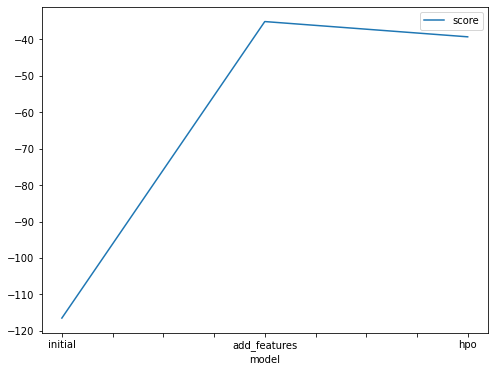

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-116.472370  , -35.125367, -39.312234 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

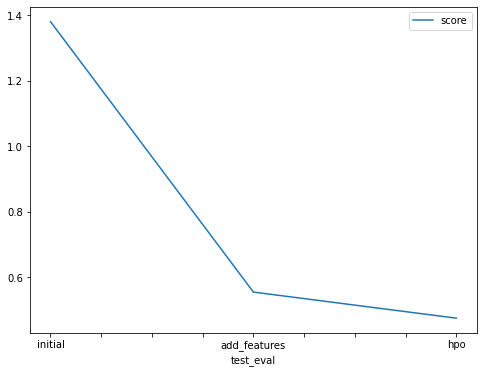

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.38027, 0.55472, 0.47508]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "time_limit": [600, 600, 600],
    "preset": ['best_quality', 'best_quality', 'best_quality'],
    "model_hpo": ['default', 'default', 'CatBoost, GBM, NN'],
    "score": [1.38027, 0.55472, 0.47508]
})

,model,time_limit,preset,model_hpo,score
0,initial,600,best_quality,default,1.38027
1,add_features,600,best_quality,default,0.55472
2,hpo,600,best_quality,"CatBoost, GBM, NN",0.47508
